In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from datetime import date
from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from torchvision import datasets, transforms

import copy
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import tqdm





In [3]:
model_path = '/content/drive/MyDrive/0_318lab/SCMP_ML/results/model1691395254.pt'
model = torch.load(model_path)

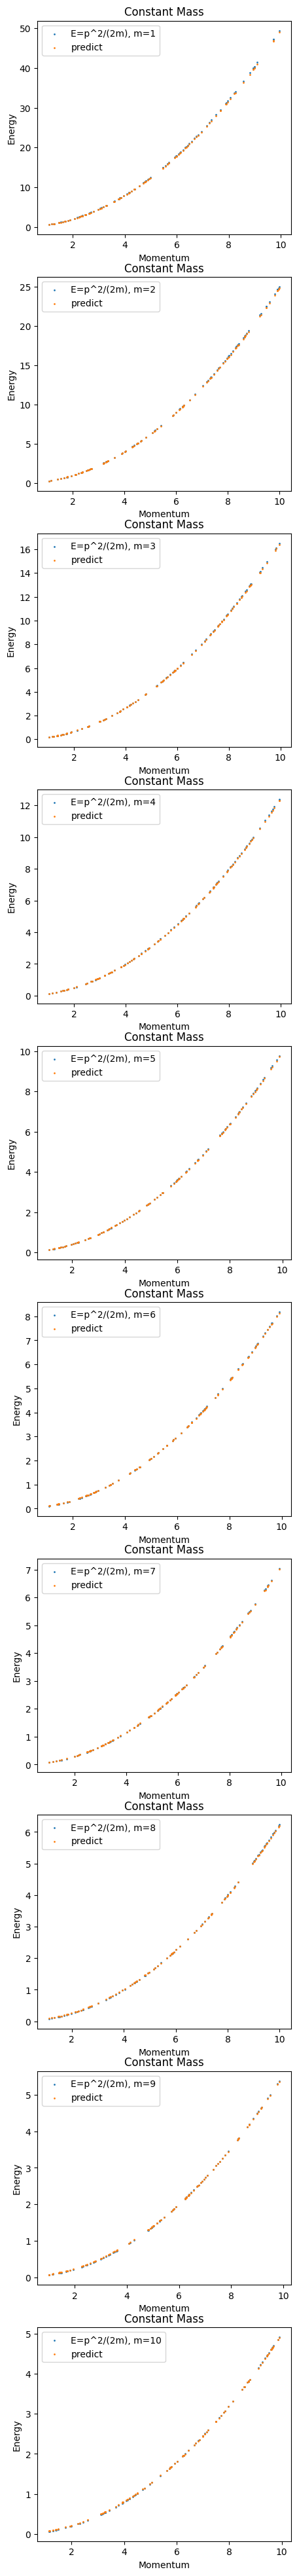

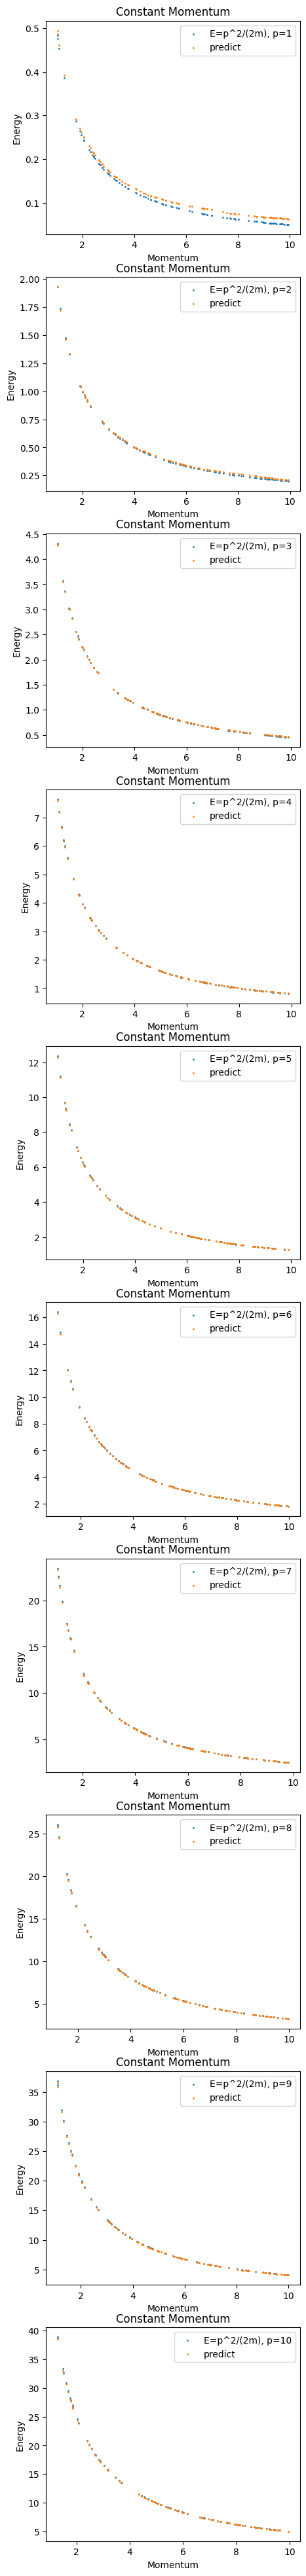

all done


In [4]:
N, D_in, D_out = 100, 2, 1

mass_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
len_mass_num = len(mass_num)
fig, axs = plt.subplots(len_mass_num, 1, figsize=(5, 5*len_mass_num))#, sharey=True)
for k in range(len_mass_num):
    # m =1
    X2 = []
    y2 = []
    for j in range(N):
        X2.append([])
        #y.append([])
        for i in range(D_out):
            X2[-1].append( mass_num[k] )
            X2[-1].append( np.random.uniform(low=1, high=10.0, size=None) )
            y2.append( (X2[-1][-1]**2) / (2*X2[-1][-2])  )


    X2 = torch.Tensor(X2)
    y2 = torch.Tensor(y2)



    model.eval()
    y_pred = model(X2)


    axs[k].scatter(X2[:,1], y2, label="E=p^2/(2m), m="+str(mass_num[k])+"", s=1)
    axs[k].scatter(X2[:,1].cpu().detach().numpy(), y_pred.cpu().detach().numpy(), label="predict", s=1)
    axs[k].legend()
    axs[k].set_xlabel('Momentum', fontsize=10)
    axs[k].set_ylabel(r'Energy', fontsize=10)
    # plt.ylabel("Y", rotation=0)
    axs[k].set_title('Constant Mass')

# plt.subplots_adjust(bottom=0.1, right=1, top=1.5)
    # axs[2].plot(names, values)
# fig.suptitle('Constant mass')


# ax.set_title('Volume and percent change')
# plt.savefig('/content/drive/MyDrive/0_318lab/SCMP_ML/figures/' + str('test') + '.png')
# plt.savefig(
#             '/content/drive/MyDrive/0_318lab/SCMP_ML/figures/' + str('P-E') + '_TestLoss_' + str(int(mse)) + '_TrainLoss_' + str(int(loss)) + '_'+str(int(time.time()))+'.pdf',
#             format="pdf",
#             bbox_inches="tight")

plt.show()



p_num = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10 ]
len_p_num = len(p_num)
fig, axs = plt.subplots(len_p_num, 1, figsize=(5, 5*len_p_num))#, sharey=True)
for k in range(len_p_num):

    # p =1
    X3 = []
    y3 = []
    for j in range(N):
        X3.append([])
        #y.append([])
        for i in range(D_out):
            X3[-1].append( np.random.uniform(low=1, high=10.0, size=None) )
            X3[-1].append( p_num[k] )
            y3.append( (X3[-1][-1]**2) / (2*X3[-1][-2])  )


    X3 = torch.Tensor(X3)
    y3 = torch.Tensor(y3)


# model.eval()
# y_pred = model(X3)
# plt.scatter(X3[:,0].cpu().detach().numpy(),y_pred.cpu().detach().numpy(), marker='*')
# # plt.scatter(X3[:,1],y_pred, marker='*')
# plt.show()


# plt.scatter(X3[:,0] ,y3, marker='.', )
# plt.show()

# plt.scatter(X3[:,0].cpu().detach().numpy(),y_pred.cpu().detach().numpy(), marker='*')
# plt.scatter(X3[:,0] ,y3, marker='.', )
# plt.show()
    model.eval()
    y_pred = model(X3)
    axs[k].scatter(X3[:,0], y3, label="E=p^2/(2m), p="+str(p_num[k])+"", s=1)
    axs[k].scatter(X3[:,0].cpu().detach().numpy(), y_pred.cpu().detach().numpy(), label="predict", s=1)
    axs[k].legend()
    axs[k].set_xlabel('Momentum', fontsize=10)
    axs[k].set_ylabel(r'Energy', fontsize=10)
    # plt.ylabel("Y", rotation=0)
    axs[k].set_title('Constant Momentum')

# plt.subplots_adjust(bottom=0.1, right=1, top=2)
    # axs[2].plot(names, values)
# fig.suptitle('Constant mass')


# ax.set_title('Volume and percent change')
# plt.savefig('/content/drive/MyDrive/0_318lab/SCMP_ML/figures/' + str('test') + '.png')
# plt.savefig(
#             '/content/drive/MyDrive/0_318lab/SCMP_ML/figures/' + str('M-E') + '_TestLoss_' + str(int(mse)) + '_TrainLoss_' + str(int(loss)) + '_'+str(int(time.time()))+'.pdf',
#             format="pdf",
#             bbox_inches="tight")

plt.show()





print('all done')



In [36]:
m = 0.1 # 0.1 1.00*10^-1
p = 100 # 100 1.00*10^2
print( 'Pre :', model( torch.FloatTensor( [ m, p ] ) ) )
print( 'Ans :', ( p ** 2 ) / ( 2 * m ) )
print( 'dif :', model( torch.FloatTensor( [ m, p ] ) ) - ( p ** 2 ) / ( 2 * m ) )
print( 'per :', ( model( torch.FloatTensor( [ m, p ] ) ) - ( p ** 2 ) / ( 2 * m ) ) / ( ( p ** 2 ) / ( 2 * m ) ) * 100 )

Pre : tensor([2418.3843], grad_fn=<AddBackward0>)
Ans : 50000.0
dif : tensor([-47581.6172], grad_fn=<SubBackward0>)
per : tensor([-95.1632], grad_fn=<MulBackward0>)


In [34]:
np.random.uniform(low=1, high=10.0, size=None)

1.9405486970626287

In [35]:
help(np.random.uniform)

Help on built-in function uniform:

uniform(...) method of numpy.random.mtrand.RandomState instance
    uniform(low=0.0, high=1.0, size=None)
    
    Draw samples from a uniform distribution.
    
    Samples are uniformly distributed over the half-open interval
    ``[low, high)`` (includes low, but excludes high).  In other words,
    any value within the given interval is equally likely to be drawn
    by `uniform`.
    
    .. note::
        New code should use the ``uniform`` method of a ``default_rng()``
        instance instead; please see the :ref:`random-quick-start`.
    
    Parameters
    ----------
    low : float or array_like of floats, optional
        Lower boundary of the output interval.  All values generated will be
        greater than or equal to low.  The default value is 0.
    high : float or array_like of floats
        Upper boundary of the output interval.  All values generated will be
        less than or equal to high.  The high limit may be included in t

In [8]:
model( torch.FloatTensor([1,1]) )

tensor([0.5106], grad_fn=<AddBackward0>)

In [9]:
1/(2*1)

0.5

In [7]:
X3

tensor([[ 6.7138, 10.0000],
        [ 1.5281, 10.0000],
        [ 2.7019, 10.0000],
        [ 3.7101, 10.0000],
        [ 4.4495, 10.0000],
        [ 2.9064, 10.0000],
        [ 8.5542, 10.0000],
        [ 2.5679, 10.0000],
        [ 7.2922, 10.0000],
        [ 9.9502, 10.0000],
        [ 4.6832, 10.0000],
        [ 4.5510, 10.0000],
        [ 9.2385, 10.0000],
        [ 5.0569, 10.0000],
        [ 4.3471, 10.0000],
        [ 3.6136, 10.0000],
        [ 1.6968, 10.0000],
        [ 7.6436, 10.0000],
        [ 8.0691, 10.0000],
        [ 3.1690, 10.0000],
        [ 9.4079, 10.0000],
        [ 4.3435, 10.0000],
        [ 1.2874, 10.0000],
        [ 1.2880, 10.0000],
        [ 8.1344, 10.0000],
        [ 8.6632, 10.0000],
        [ 1.7887, 10.0000],
        [ 9.6355, 10.0000],
        [ 6.1740, 10.0000],
        [ 9.5701, 10.0000],
        [ 5.1713, 10.0000],
        [ 8.0141, 10.0000],
        [ 5.7735, 10.0000],
        [ 5.1569, 10.0000],
        [ 8.7293, 10.0000],
        [ 6.6221, 10

In [ ]:
model

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
help(model)

Help on Sequential in module torch.nn.modules.container object:

class Sequential(torch.nn.modules.module.Module)
 |  Sequential(*args)
 |  
 |  A sequential container.
 |  Modules will be added to it in the order they are passed in the
 |  constructor. Alternatively, an ``OrderedDict`` of modules can be
 |  passed in. The ``forward()`` method of ``Sequential`` accepts any
 |  input and forwards it to the first module it contains. It then
 |  "chains" outputs to inputs sequentially for each subsequent module,
 |  finally returning the output of the last module.
 |  
 |  The value a ``Sequential`` provides over manually calling a sequence
 |  of modules is that it allows treating the whole container as a
 |  single module, such that performing a transformation on the
 |  ``Sequential`` applies to each of the modules it stores (which are
 |  each a registered submodule of the ``Sequential``).
 |  
 |  What's the difference between a ``Sequential`` and a
 |  :class:`torch.nn.ModuleList`? 

In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0363, -0.7686],
                      [ 0.0079, -0.5516],
                      [-0.4027,  0.3503],
                      [-0.4076, -0.2412],
                      [-0.4490, -0.6746],
                      [-0.2895,  0.3337],
                      [ 0.1021, -0.2624],
                      [ 0.0744, -0.2886],
                      [-0.0604,  0.1976],
                      [-0.2638, -0.3582],
                      [-0.5149,  0.0063],
                      [ 0.0620,  0.1000],
                      [-0.3442, -0.3433],
                      [-0.6983, -0.3407],
                      [-0.0172, -0.6758],
                      [-0.3576,  0.4980],
                      [-0.4568, -0.1419],
                      [ 0.1348, -0.5526],
                      [ 0.1150,  0.3982],
                      [-0.0081, -0.5351],
                      [ 0.0519,  0.2104],
                      [ 0.1021,  0.2520],
                      [-0.7418, -0.1306],
        

In [ ]:
model.children()

<generator object Module.children at 0x7de1a1e02b90>

In [ ]:
model.parameters()

<generator object Module.parameters at 0x7de1a1e02a40>

In [ ]:
for i in model.parameters():
    print(i)

Parameter containing:
tensor([[-0.0363, -0.7686],
        [ 0.0079, -0.5516],
        [-0.4027,  0.3503],
        [-0.4076, -0.2412],
        [-0.4490, -0.6746],
        [-0.2895,  0.3337],
        [ 0.1021, -0.2624],
        [ 0.0744, -0.2886],
        [-0.0604,  0.1976],
        [-0.2638, -0.3582],
        [-0.5149,  0.0063],
        [ 0.0620,  0.1000],
        [-0.3442, -0.3433],
        [-0.6983, -0.3407],
        [-0.0172, -0.6758],
        [-0.3576,  0.4980],
        [-0.4568, -0.1419],
        [ 0.1348, -0.5526],
        [ 0.1150,  0.3982],
        [-0.0081, -0.5351],
        [ 0.0519,  0.2104],
        [ 0.1021,  0.2520],
        [-0.7418, -0.1306],
        [ 0.0603,  0.1846],
        [-0.0227,  0.5282],
        [-0.1681, -0.6439],
        [-0.5962, -0.4602],
        [ 0.0198,  0.2245],
        [-0.6118, -0.3470],
        [-0.1462, -0.4887],
        [-0.1736,  0.4718],
        [-0.3147,  0.4143],
        [-0.5731,  0.7404],
        [-0.0015, -0.5960],
        [ 0.2343,  0.1037]

In [ ]:
print(dir(model))

['T_destination', '__add__', '__annotations__', '__call__', '__class__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_apply', '_backward_hooks', '_backward_pre_hooks', '_buffers', '_call_impl', '_forward_hooks', '_forward_hooks_with_kwargs', '_forward_pre_hooks', '_forward_pre_hooks_with_kwargs', '_get_backward_hooks', '_get_backward_pre_hooks', '_get_item_by_idx', '_get_name', '_is_full_backward_hook', '_load_from_state_dict', '_load_state_dict_post_hooks', '_load_state_dict_pre_hooks', '_maybe_warn_non_full_backward_hook', '_modules', '_named_members', '_non

In [ ]:
model.type()

TypeError: ignored

In [ ]:
model.load_state_dict()

TypeError: ignored

In [ ]:
for i in model.children():
    print(i)

Linear(in_features=2, out_features=100, bias=True)
ReLU()
Linear(in_features=100, out_features=100, bias=True)
ReLU()
Linear(in_features=100, out_features=100, bias=True)
ReLU()
Linear(in_features=100, out_features=1, bias=True)


In [ ]:
model.get_parameter()

TypeError: ignored

In [ ]:
model.modules()

<generator object Module.modules at 0x7de1a1cd6b90>

In [ ]:
for i in model.modules():
    print(i)

Sequential(
  (0): Linear(in_features=2, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=100, bias=True)
  (3): ReLU()
  (4): Linear(in_features=100, out_features=100, bias=True)
  (5): ReLU()
  (6): Linear(in_features=100, out_features=1, bias=True)
)
Linear(in_features=2, out_features=100, bias=True)
ReLU()
Linear(in_features=100, out_features=100, bias=True)
ReLU()
Linear(in_features=100, out_features=100, bias=True)
ReLU()
Linear(in_features=100, out_features=1, bias=True)
